In [380]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn import tree, svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import sklearn.datasets
import umap.umap_ as umap

from sklearn.model_selection import KFold, cross_val_score

import statistics
import numpy as np

In [417]:
aflp = pd.read_excel(open('CCGAA-CCTAT.xlsx', 'rb'))
clusters = pd.read_excel(open('test_media_genomi_senza_20.xlsx', 'rb'))

display(aflp)
display(clusters)

,50,51,52,53,54,55,56,57,58,59,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,accession number
0,9,5,0,5,2,0,9,6,2,9,...,1,4,3,0,2,1,2,2,2,GCA_000612485.1
1,9,5,0,5,2,0,9,6,2,9,...,1,4,3,0,2,1,2,2,2,GCA_000765395.1
2,9,5,0,5,2,0,9,6,2,9,...,1,4,2,0,2,2,1,2,2,GCA_003184445.1
3,9,5,0,5,2,0,10,5,2,9,...,3,2,3,0,2,1,3,1,2,GCA_003186245.1
4,2,1,1,4,1,2,6,1,2,3,...,3,1,1,2,2,2,0,0,0,GCA_004634545.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,5,1,4,3,3,5,16,1,2,6,...,3,1,0,2,2,2,0,3,2,GCA_000152165.1
396,5,1,4,3,3,5,16,1,2,6,...,3,1,0,2,2,2,0,3,2,GCA_000083565.1
397,5,1,4,3,3,4,16,1,3,6,...,2,2,1,1,1,1,0,3,2,GCA_000009465.1
398,5,1,4,3,5,2,13,0,2,5,...,3,1,2,1,2,2,0,4,4,GCA_000009105.1


,accession number,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis
0,GCA_000612485.1,1,0,0,0,0,0,0
1,GCA_000765395.1,1,0,0,0,0,0,0
2,GCA_003184445.1,1,0,0,0,0,0,0
3,GCA_003186245.1,1,0,0,0,0,0,0
4,GCA_004634545.1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
298,GCA_003355335.1,0,0,0,0,0,0,1
299,GCA_003355315.1,0,0,0,0,0,0,1
300,GCA_003355295.1,0,0,0,0,0,0,1
301,GCA_003355275.1,0,0,0,0,0,0,1


In [418]:
aflp['accession number'] = aflp['accession number'].astype(str)
clusters['accession number'] = clusters['accession number'].astype(str)
data = pd.merge(aflp, clusters, on='accession number')
display(data)

,50,51,52,53,54,55,56,57,58,59,...,1499,1500,accession number,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis
0,9,5,0,5,2,0,9,6,2,9,...,2,2,GCA_000612485.1,1,0,0,0,0,0,0
1,9,5,0,5,2,0,9,6,2,9,...,2,2,GCA_000765395.1,1,0,0,0,0,0,0
2,9,5,0,5,2,0,9,6,2,9,...,2,2,GCA_003184445.1,1,0,0,0,0,0,0
3,9,5,0,5,2,0,10,5,2,9,...,1,2,GCA_003186245.1,1,0,0,0,0,0,0
4,2,1,1,4,1,2,6,1,2,3,...,0,0,GCA_004634545.1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,1,1,4,1,2,6,1,2,3,...,0,0,GCA_003355335.1,0,0,0,0,0,0,1
299,2,1,1,4,1,2,6,1,2,3,...,0,0,GCA_003355315.1,0,0,0,0,0,0,1
300,2,1,1,4,1,2,6,1,2,3,...,0,0,GCA_003355295.1,0,0,0,0,0,0,1
301,2,1,1,4,1,2,6,1,2,3,...,0,0,GCA_003355275.1,0,0,0,0,0,0,1


In [419]:
aflp_data = data.iloc[:,0:1451]#:451]
clusters_data = data.iloc[:,1452:1459]#452:457]#1452:1453]#1467] #50

display(aflp_data)
display(clusters_data)

,50,51,52,53,54,55,56,57,58,59,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,9,5,0,5,2,0,9,6,2,9,...,2,1,4,3,0,2,1,2,2,2
1,9,5,0,5,2,0,9,6,2,9,...,2,1,4,3,0,2,1,2,2,2
2,9,5,0,5,2,0,9,6,2,9,...,2,1,4,2,0,2,2,1,2,2
3,9,5,0,5,2,0,10,5,2,9,...,2,3,2,3,0,2,1,3,1,2
4,2,1,1,4,1,2,6,1,2,3,...,1,3,1,1,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,1,1,4,1,2,6,1,2,3,...,1,3,1,1,2,2,2,0,0,0
299,2,1,1,4,1,2,6,1,2,3,...,1,3,1,1,2,2,2,0,0,0
300,2,1,1,4,1,2,6,1,2,3,...,1,3,1,1,2,2,2,0,0,0
301,2,1,1,4,1,2,6,1,2,3,...,1,3,1,1,2,2,2,0,0,0


,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,1
299,0,0,0,0,0,0,1
300,0,0,0,0,0,0,1
301,0,0,0,0,0,0,1


In [420]:
aflp_data[aflp_data > 0] = 1

display(aflp_data)
display(clusters_data)

,50,51,52,53,54,55,56,57,58,59,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
2,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
3,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
299,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
300,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
301,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,1
299,0,0,0,0,0,0,1
300,0,0,0,0,0,0,1
301,0,0,0,0,0,0,1


### Calcolo accurancy, f1-score e feature importance per ogni colonna e faccio il grafico

In [263]:
classifiers = list()

cvs = list()
cvs_std = list()
f1_df = list() 
f1_column_model1 = list()
f1_column_model2 = list()
f1_column_model3 = list()
f1_column_model4 = list()
f1_column_model5 = list()
f1_column_model6 = list()
f1_column_model7 = list()
f1_column_model8 = list()


model1 = xgboost.XGBClassifier()
classifiers.append(model1)

model2 = tree.DecisionTreeClassifier()
classifiers.append(model2)
model3 = RandomForestClassifier()
classifiers.append(model3)
model4 = ExtraTreesClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)

model6 = GaussianNB()
classifiers.append(model6)

model7 = KNeighborsClassifier()
classifiers.append(model7)

model8 = MLPClassifier(max_iter=500, random_state=0)
classifiers.append(model8)

classifiers_name =  ['XGBClassifier()', 'DecisionTreeClassifier()', 'RandomForestClassifier()', 
                   'ExtraTreesClassifier', 'AdaBoostClassifier()', 'GaussianNB()', 'KNeighborsClassifier()',
                   'MLPClassifier(max_iter=500, random_state=0)']

print(classifiers)
    
X = aflp_data.values

for column in clusters_data.columns:
    
    TP = 0
    TP_0 = 0
    TP_1 = 0
    
    cvs_column = list()
    cvs_std_column = list()
    #f1_model = list()
    f1_model1 = list()
    f1_model2 = list()
    f1_model3 = list()
    f1_model4 = list()
    f1_model5 = list()
    f1_model6 = list()
    f1_model7 = list()
    f1_model8 = list()
        
    y = clusters_data[column].values
    y[np.isnan(y)] = 0
    
        
    pos = sum(y)
    neg = len(y) - pos
    
    print('-'*80) 
    print(str(column) + " ;positivi: " + str(pos) + " ;negativi: " + str(neg))   
    print()
    
    kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = None)
    kf.get_n_splits(X, y)

    count_split = 1
    for train_index, test_index in kf.split(X, y):
       
        print("Split numero " + str(count_split))
        print(sum(y[train_index]),sum(y[test_index]))

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
            
        for clf in classifiers:
            print(clf)
             

            if count_split == 1:
                scores = cross_val_score(clf, X, y)         
                print(scores)
                cvs_column.append(scores.mean())
                cvs_std_column.append(scores.std())
                print(str(clf) + ' cvs ' + str(scores.mean()))
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
                
            f1 = f1_score(y_test, y_pred)
            print('f1: ' + str(f1))
            print()
    
                        
            for i in range(len(y_pred)):
                if y_pred[i] == y_test[i]:
                    TP = TP + 1
                    if y_test[i] == 0:
                        TP_0 += 1
                    else:
                        TP_1 += 1

            print('Predetti ' + str(TP) + " ;predetti positivi: " + str(TP_1) + " ;predetti negativi: " + str(TP_0))
            print()
                
            if clf == model1:
                f1_model1.append(f1)
            elif clf == model2:
                f1_model2.append(f1)
            elif clf == model3:
                f1_model3.append(f1)
                
            elif clf == model4:
                f1_model4.append(f1)
            elif clf == model5:
                f1_model5.append(f1)
            elif clf == model6:
                f1_model6.append(f1)
            elif clf == model7:
                f1_model7.append(f1)
            elif clf == model8:
                f1_model8.append(f1)
            else:
                print('ERROR')
        
            TP = 0
            TP_0 = 0
            TP_1 = 0
        count_split += 1
    
    print()
    
    
    cvs.append(cvs_column)
    cvs_std.append(cvs_std_column)
    f1_column_model1.append(np.mean(f1_model1))
    f1_column_model2.append(np.mean(f1_model2))
    f1_column_model3.append(np.mean(f1_model3))
    f1_column_model4.append(np.mean(f1_model4))
    f1_column_model5.append(np.mean(f1_model5))
    f1_column_model6.append(np.mean(f1_model6))
    f1_column_model7.append(np.mean(f1_model7))
    f1_column_model8.append(np.mean(f1_model8))
    
f1_df.append(f1_column_model1)
f1_df.append(f1_column_model2)
f1_df.append(f1_column_model3)
f1_df.append(f1_column_model4)
f1_df.append(f1_column_model5)
f1_df.append(f1_column_model6)
f1_df.append(f1_column_model7)
f1_df.append(f1_column_model8)



[XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier(), MLPClassifier(max_iter=500, random_state=0)]
-----------------------------------------------------------------

f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

ExtraTreesClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

AdaBoostClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

GaussianNB()
f1: 0.4081632653061224

Predetti 31 ;predetti positivi: 10 ;predetti negativi: 21

KNeighborsClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

MLPClassifier(max_iter=500, random_state=0)
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

Split numero 5
40 10
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              m

f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

DecisionTreeClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

RandomForestClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

ExtraTreesClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

AdaBoostClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

GaussianNB()
f1: 0.375

Predetti 30 ;predetti positivi: 9 ;predetti negativi: 21

KNeighborsClassifier()
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

MLPClassifier(max_iter=500, random_state=0)
f1: 0.0

Predetti 50 ;predetti positivi: 0 ;predetti negativi: 50

Split numero 5
40 10
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
  

f1: 0.9090909090909091

Predetti 60 ;predetti positivi: 5 ;predetti negativi: 55

GaussianNB()
f1: 0.17777777777777778

Predetti 24 ;predetti positivi: 4 ;predetti negativi: 20

KNeighborsClassifier()
f1: 0.8

Predetti 59 ;predetti positivi: 4 ;predetti negativi: 55

MLPClassifier(max_iter=500, random_state=0)
f1: 0.0

Predetti 55 ;predetti positivi: 0 ;predetti negativi: 55

Split numero 4
21 5
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan,

f1: 0.18181818181818182

Predetti 52 ;predetti positivi: 1 ;predetti negativi: 51

Split numero 3
38 10
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
f1: 0.0

Predetti 51 ;predetti positivi: 0 ;predetti negativi: 51

DecisionTreeClassifier()
f1: 0.0

Predetti 51 ;predetti positivi: 0 ;predetti

f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

DecisionTreeClassifier()
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

RandomForestClassifier()
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

ExtraTreesClassifier()
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

AdaBoostClassifier()
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

GaussianNB()
f1: 0.2608695652173913

Predetti 27 ;predetti positivi: 6 ;predetti negativi: 21

KNeighborsClassifier()
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

MLPClassifier(max_iter=500, random_state=0)
f1: 0.6666666666666666

Predetti 58 ;predetti positivi: 3 ;predetti negativi: 55

Split numero 3
23 6
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytr

[0.8852459  0.93442623 1.         0.98333333 0.96666667]
MLPClassifier(max_iter=500, random_state=0) cvs 0.9539344262295082
f1: 0.888888888888889

Predetti 59 ;predetti positivi: 8 ;predetti negativi: 51

Split numero 2
40 10
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
f1: 0.8235294117647058

[0.95081967 1.         0.83606557 0.83333333 0.83333333]
DecisionTreeClassifier() cvs 0.8907103825136613
f1: 0.4615384615384615

Predetti 54 ;predetti positivi: 3 ;predetti negativi: 51

RandomForestClassifier()
[1.         0.98360656 0.86885246 0.83333333 0.83333333]
RandomForestClassifier() cvs 0.9038251366120219
f1: 0.5714285714285715

Predetti 55 ;predetti positivi: 4 ;predetti negativi: 51

ExtraTreesClassifier()
[1.         0.98360656 0.86885246 0.83333333 0.83333333]
ExtraTreesClassifier() cvs 0.9038251366120219
f1: 0.5714285714285715

Predetti 55 ;predetti positivi: 4 ;predetti negativi: 51

AdaBoostClassifier()
[0.93442623 1.         0.86885246 0.8        0.83333333]
AdaBoostClassifier() cvs 0.8873224043715846
f1: 0.4615384615384615

Predetti 54 ;predetti positivi: 3 ;predetti negativi: 51

GaussianNB()
[0.24590164 0.21311475 0.50819672 0.43333333 0.8       ]
GaussianNB() cvs 0.44010928961748635
f1: 0.37037037037037035

Predetti 27 ;predetti positivi: 10 ;predetti negativi: 17

In [264]:
f1 = pd.DataFrame(f1_df)
f1.columns = clusters_data.columns
f1['mean_f1'] = f1.mean(axis=1)
f1['max_f1'] = f1.max(axis=1)
f1['Classifiers'] = classifiers_name
f1.to_excel('f1_score.xlsx', index=None)

f1

,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis,mean_f1,max_f1,Classifiers
0,0.133333,0.000000,0.521905,0.248485,0.660000,0.820261,0.523810,0.415399,0.820261,XGBClassifier()
1,0.103030,0.000000,0.519913,0.242424,0.660000,0.753922,0.487546,0.395262,0.753922,DecisionTreeClassifier()
2,0.103030,0.000000,0.474286,0.312121,0.660000,0.845029,0.590476,0.426420,0.845029,RandomForestClassifier()
3,0.133333,0.000000,0.496104,0.284848,0.660000,0.859735,0.590476,0.432071,0.859735,ExtraTreesClassifier
4,0.103030,0.000000,0.591342,0.248485,0.633333,0.837513,0.501832,0.416505,0.837513,AdaBoostClassifier()
5,0.390660,0.387557,0.173516,0.371176,0.239345,0.350370,0.371288,0.326273,0.390660,GaussianNB()
6,0.000000,0.000000,0.521905,0.367657,0.660000,0.845029,0.523810,0.416914,0.845029,KNeighborsClassifier()
7,0.000000,0.000000,0.247619,0.252121,0.660000,0.859735,0.609524,0.375571,0.859735,"MLPClassifier(max_iter=500, random_state=0)"


In [265]:
cvs = pd.DataFrame(cvs)
cvs = cvs.T
cvs.columns = clusters_data.columns
cvs['mean_cvs'] = cvs.mean(axis=1)
cvs['max_cvs'] = cvs.max(axis=1)
cvs['Classifiers'] = classifiers_name
cvs.to_excel('cvs.xlsx', index=None)
cvs

,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis,mean_cvs,max_cvs,Classifiers
0,0.834973,0.815027,0.944098,0.851475,0.956831,0.874372,0.884153,0.880133,0.956831,XGBClassifier()
1,0.834973,0.831639,0.934262,0.848142,0.956831,0.867814,0.890710,0.880625,0.956831,DecisionTreeClassifier()
2,0.834973,0.834973,0.937432,0.861311,0.956831,0.947377,0.903825,0.896674,0.956831,RandomForestClassifier()
3,0.834973,0.834973,0.944044,0.861311,0.956831,0.950656,0.903825,0.898087,0.956831,ExtraTreesClassifier
4,0.834973,0.834973,0.940710,0.854754,0.956831,0.821093,0.887322,0.875808,0.956831,AdaBoostClassifier()
5,0.486339,0.499454,0.364317,0.463333,0.390765,0.380219,0.440109,0.432077,0.499454,GaussianNB()
6,0.834973,0.834973,0.914590,0.261639,0.956831,0.885082,0.877486,0.795082,0.956831,KNeighborsClassifier()
7,0.834973,0.834973,0.944044,0.848197,0.956831,0.953934,0.900546,0.896214,0.956831,"MLPClassifier(max_iter=500, random_state=0)"


In [266]:
std = pd.DataFrame(cvs_std)
std = std.T
std.columns = clusters_data.columns
std['mean_std'] = std.mean(axis=1)
std['max_std'] = std.max(axis=1)
std['Classifiers'] = classifiers_name
std.to_excel('std.xlsx', index=None)
std

,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis,mean_std,max_std,Classifiers
0,0.001339,0.025488,0.030253,0.010438,0.037389,0.105862,0.049742,0.037216,0.105862,XGBClassifier()
1,0.001339,0.007561,0.053758,0.028429,0.037389,0.104468,0.070891,0.043405,0.104468,DecisionTreeClassifier()
2,0.001339,0.001339,0.023872,0.022700,0.037389,0.052175,0.073179,0.030285,0.073179,RandomForestClassifier()
3,0.001339,0.001339,0.028408,0.022700,0.037389,0.046291,0.073179,0.030092,0.073179,ExtraTreesClassifier
4,0.001339,0.001339,0.026470,0.024257,0.037389,0.089248,0.071828,0.035981,0.089248,AdaBoostClassifier()
5,0.209977,0.189452,0.178594,0.236391,0.189458,0.140350,0.211398,0.193660,0.236391,GaussianNB()
6,0.001339,0.001339,0.077048,0.126515,0.037389,0.119451,0.059537,0.060374,0.126515,KNeighborsClassifier()
7,0.001339,0.001339,0.030301,0.012062,0.037389,0.040613,0.069821,0.027552,0.069821,"MLPClassifier(max_iter=500, random_state=0)"


In [267]:
df = pd.merge(cvs, f1, on='Classifiers')
df = pd.merge(df, std, on='Classifiers')

df

,Bordetella_holmesii_x,Bordetella_parapertussis_x,Burkholderia_cenocepacia_x,Burkholderia_glumae_x,Burkholderia_mallei_x,Burkholderia_multivorans_x,Neisseria_meningitidis_x,mean_cvs,max_cvs,Classifiers,...,max_f1,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis,mean_std,max_std
0,0.834973,0.815027,0.944098,0.851475,0.956831,0.874372,0.884153,0.880133,0.956831,XGBClassifier(),...,0.820261,0.001339,0.025488,0.030253,0.010438,0.037389,0.105862,0.049742,0.037216,0.105862
1,0.834973,0.831639,0.934262,0.848142,0.956831,0.867814,0.890710,0.880625,0.956831,DecisionTreeClassifier(),...,0.753922,0.001339,0.007561,0.053758,0.028429,0.037389,0.104468,0.070891,0.043405,0.104468
2,0.834973,0.834973,0.937432,0.861311,0.956831,0.947377,0.903825,0.896674,0.956831,RandomForestClassifier(),...,0.845029,0.001339,0.001339,0.023872,0.022700,0.037389,0.052175,0.073179,0.030285,0.073179
3,0.834973,0.834973,0.944044,0.861311,0.956831,0.950656,0.903825,0.898087,0.956831,ExtraTreesClassifier,...,0.859735,0.001339,0.001339,0.028408,0.022700,0.037389,0.046291,0.073179,0.030092,0.073179
4,0.834973,0.834973,0.940710,0.854754,0.956831,0.821093,0.887322,0.875808,0.956831,AdaBoostClassifier(),...,0.837513,0.001339,0.001339,0.026470,0.024257,0.037389,0.089248,0.071828,0.035981,0.089248
5,0.486339,0.499454,0.364317,0.463333,0.390765,0.380219,0.440109,0.432077,0.499454,GaussianNB(),...,0.390660,0.209977,0.189452,0.178594,0.236391,0.189458,0.140350,0.211398,0.193660,0.236391
6,0.834973,0.834973,0.914590,0.261639,0.956831,0.885082,0.877486,0.795082,0.956831,KNeighborsClassifier(),...,0.845029,0.001339,0.001339,0.077048,0.126515,0.037389,0.119451,0.059537,0.060374,0.126515
7,0.834973,0.834973,0.944044,0.848197,0.956831,0.953934,0.900546,0.896214,0.956831,"MLPClassifier(max_iter=500, random_state=0)",...,0.859735,0.001339,0.001339,0.030301,0.012062,0.037389,0.040613,0.069821,0.027552,0.069821


In [268]:
cvs_data = df.iloc[:,0:13]
display(cvs_data)

f1_data = df.iloc[:,13:25]
display(f1_data)

std_data = df.iloc[:,26:37]
display(std_data)

,Bordetella_holmesii_x,Bordetella_parapertussis_x,Burkholderia_cenocepacia_x,Burkholderia_glumae_x,Burkholderia_mallei_x,Burkholderia_multivorans_x,Neisseria_meningitidis_x,mean_cvs,max_cvs,Classifiers,Bordetella_holmesii_y,Bordetella_parapertussis_y,Burkholderia_cenocepacia_y
0,0.834973,0.815027,0.944098,0.851475,0.956831,0.874372,0.884153,0.880133,0.956831,XGBClassifier(),0.133333,0.000000,0.521905
1,0.834973,0.831639,0.934262,0.848142,0.956831,0.867814,0.890710,0.880625,0.956831,DecisionTreeClassifier(),0.103030,0.000000,0.519913
2,0.834973,0.834973,0.937432,0.861311,0.956831,0.947377,0.903825,0.896674,0.956831,RandomForestClassifier(),0.103030,0.000000,0.474286
3,0.834973,0.834973,0.944044,0.861311,0.956831,0.950656,0.903825,0.898087,0.956831,ExtraTreesClassifier,0.133333,0.000000,0.496104
4,0.834973,0.834973,0.940710,0.854754,0.956831,0.821093,0.887322,0.875808,0.956831,AdaBoostClassifier(),0.103030,0.000000,0.591342
5,0.486339,0.499454,0.364317,0.463333,0.390765,0.380219,0.440109,0.432077,0.499454,GaussianNB(),0.390660,0.387557,0.173516
6,0.834973,0.834973,0.914590,0.261639,0.956831,0.885082,0.877486,0.795082,0.956831,KNeighborsClassifier(),0.000000,0.000000,0.521905
7,0.834973,0.834973,0.944044,0.848197,0.956831,0.953934,0.900546,0.896214,0.956831,"MLPClassifier(max_iter=500, random_state=0)",0.000000,0.000000,0.247619


,Burkholderia_glumae_y,Burkholderia_mallei_y,Burkholderia_multivorans_y,Neisseria_meningitidis_y,mean_f1,max_f1,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans
0,0.248485,0.660000,0.820261,0.523810,0.415399,0.820261,0.001339,0.025488,0.030253,0.010438,0.037389,0.105862
1,0.242424,0.660000,0.753922,0.487546,0.395262,0.753922,0.001339,0.007561,0.053758,0.028429,0.037389,0.104468
2,0.312121,0.660000,0.845029,0.590476,0.426420,0.845029,0.001339,0.001339,0.023872,0.022700,0.037389,0.052175
3,0.284848,0.660000,0.859735,0.590476,0.432071,0.859735,0.001339,0.001339,0.028408,0.022700,0.037389,0.046291
4,0.248485,0.633333,0.837513,0.501832,0.416505,0.837513,0.001339,0.001339,0.026470,0.024257,0.037389,0.089248
5,0.371176,0.239345,0.350370,0.371288,0.326273,0.390660,0.209977,0.189452,0.178594,0.236391,0.189458,0.140350
6,0.367657,0.660000,0.845029,0.523810,0.416914,0.845029,0.001339,0.001339,0.077048,0.126515,0.037389,0.119451
7,0.252121,0.660000,0.859735,0.609524,0.375571,0.859735,0.001339,0.001339,0.030301,0.012062,0.037389,0.040613


,mean_std,max_std
0,0.037216,0.105862
1,0.043405,0.104468
2,0.030285,0.073179
3,0.030092,0.073179
4,0.035981,0.089248
5,0.193660,0.236391
6,0.060374,0.126515
7,0.027552,0.069821


In [269]:
cvs_data = df.iloc[:,0:7]
display(cvs_data)


,Bordetella_holmesii_x,Bordetella_parapertussis_x,Burkholderia_cenocepacia_x,Burkholderia_glumae_x,Burkholderia_mallei_x,Burkholderia_multivorans_x,Neisseria_meningitidis_x
0,0.834973,0.815027,0.944098,0.851475,0.956831,0.874372,0.884153
1,0.834973,0.831639,0.934262,0.848142,0.956831,0.867814,0.890710
2,0.834973,0.834973,0.937432,0.861311,0.956831,0.947377,0.903825
3,0.834973,0.834973,0.944044,0.861311,0.956831,0.950656,0.903825
4,0.834973,0.834973,0.940710,0.854754,0.956831,0.821093,0.887322
5,0.486339,0.499454,0.364317,0.463333,0.390765,0.380219,0.440109
6,0.834973,0.834973,0.914590,0.261639,0.956831,0.885082,0.877486
7,0.834973,0.834973,0.944044,0.848197,0.956831,0.953934,0.900546


In [270]:
f1_data = df.iloc[:,10:17]
display(f1_data)

,Bordetella_holmesii_y,Bordetella_parapertussis_y,Burkholderia_cenocepacia_y,Burkholderia_glumae_y,Burkholderia_mallei_y,Burkholderia_multivorans_y,Neisseria_meningitidis_y
0,0.133333,0.000000,0.521905,0.248485,0.660000,0.820261,0.523810
1,0.103030,0.000000,0.519913,0.242424,0.660000,0.753922,0.487546
2,0.103030,0.000000,0.474286,0.312121,0.660000,0.845029,0.590476
3,0.133333,0.000000,0.496104,0.284848,0.660000,0.859735,0.590476
4,0.103030,0.000000,0.591342,0.248485,0.633333,0.837513,0.501832
5,0.390660,0.387557,0.173516,0.371176,0.239345,0.350370,0.371288
6,0.000000,0.000000,0.521905,0.367657,0.660000,0.845029,0.523810
7,0.000000,0.000000,0.247619,0.252121,0.660000,0.859735,0.609524


In [271]:
std_data = df.iloc[:,19:26]
display(std_data)

,Bordetella_holmesii,Bordetella_parapertussis,Burkholderia_cenocepacia,Burkholderia_glumae,Burkholderia_mallei,Burkholderia_multivorans,Neisseria_meningitidis
0,0.001339,0.025488,0.030253,0.010438,0.037389,0.105862,0.049742
1,0.001339,0.007561,0.053758,0.028429,0.037389,0.104468,0.070891
2,0.001339,0.001339,0.023872,0.022700,0.037389,0.052175,0.073179
3,0.001339,0.001339,0.028408,0.022700,0.037389,0.046291,0.073179
4,0.001339,0.001339,0.026470,0.024257,0.037389,0.089248,0.071828
5,0.209977,0.189452,0.178594,0.236391,0.189458,0.140350,0.211398
6,0.001339,0.001339,0.077048,0.126515,0.037389,0.119451,0.059537
7,0.001339,0.001339,0.030301,0.012062,0.037389,0.040613,0.069821


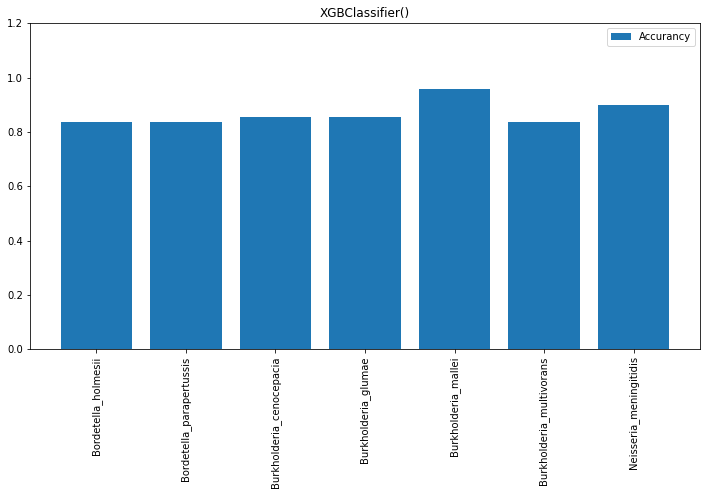

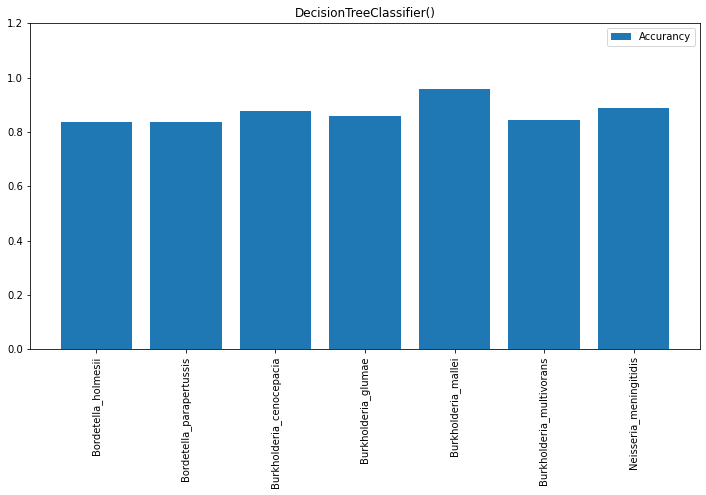

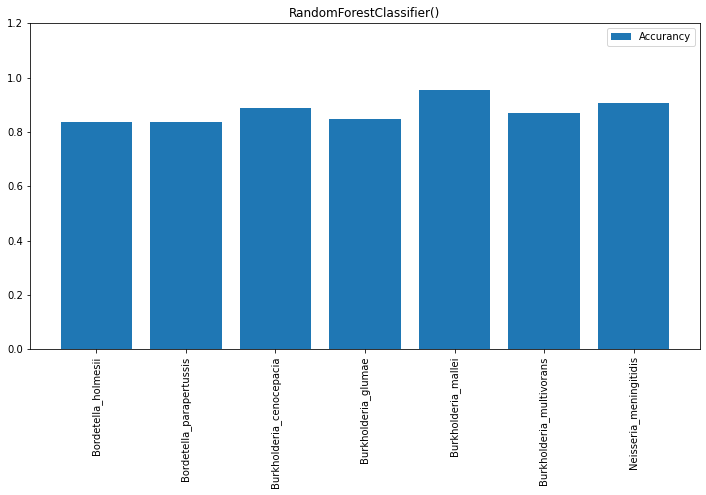

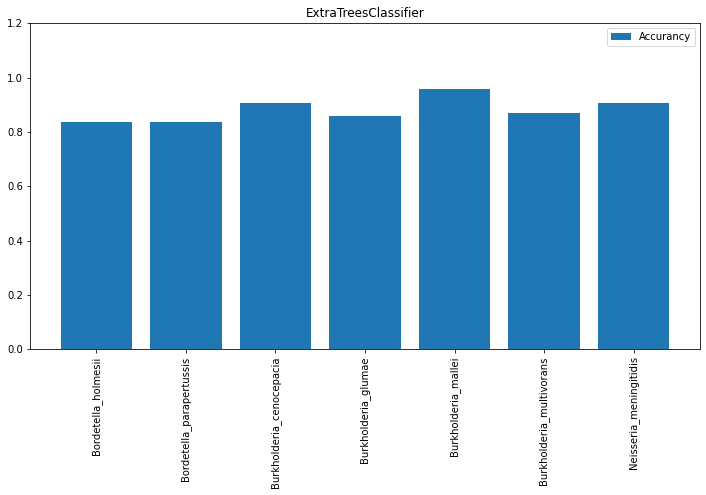

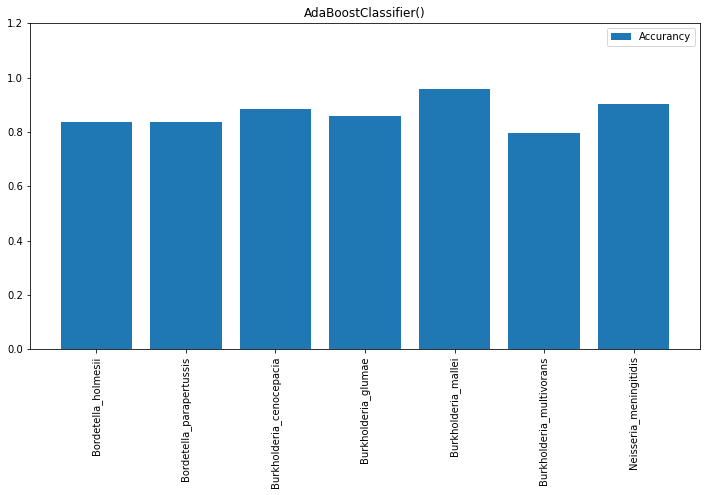

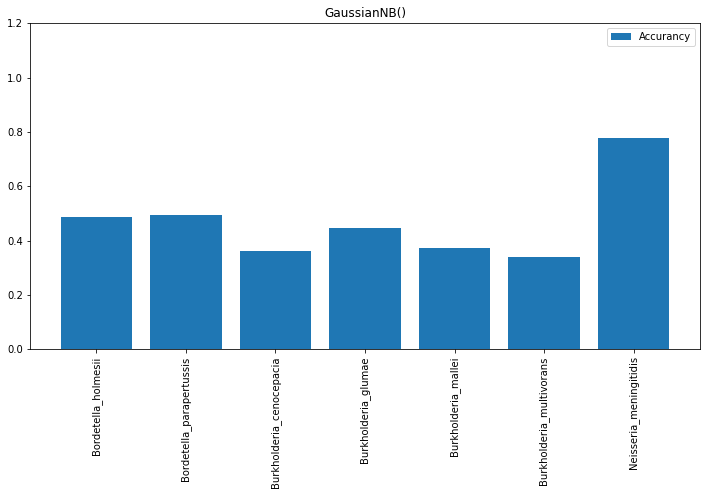

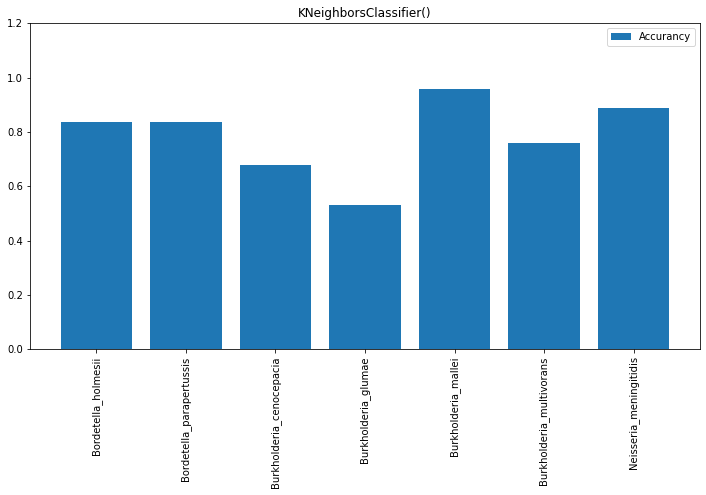

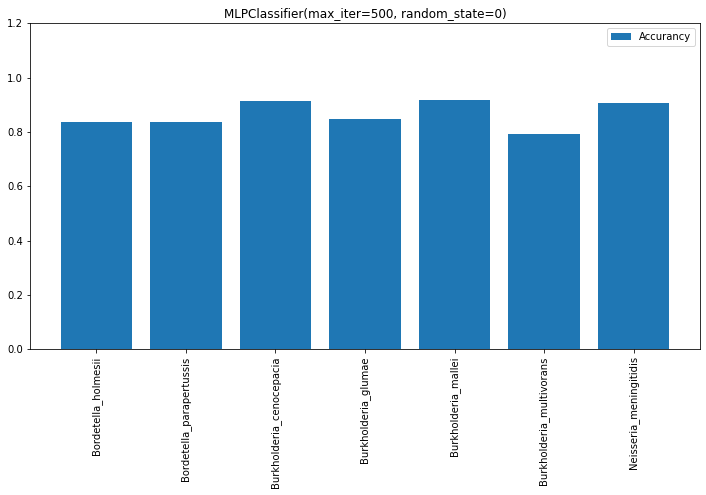

In [966]:
for row in range(len(df)):
    plt.figure(figsize=(12,6))
    plt.bar(clusters_data.columns, cvs_data.iloc[row,:], label = "Accurancy")
    #plt.scatter(clusters_data.columns, std_data.iloc[row,:], label = "Std", marker="*")
    plt.xticks(rotation=90)
    plt.ylim(0, 1.2)
    plt.legend()
    plt.title(classifiers_name[row])
    plt.savefig('cvs_' + classifiers_name[row] + '.png', dpi=200, bbox_inches="tight")
    #plt.savefig('std_' + classifiers_name[row] + '.png', dpi=200, bbox_inches="tight")
    plt.show()

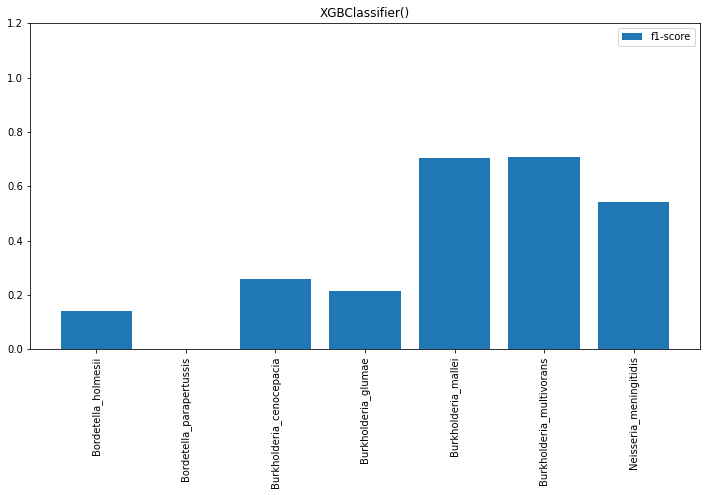

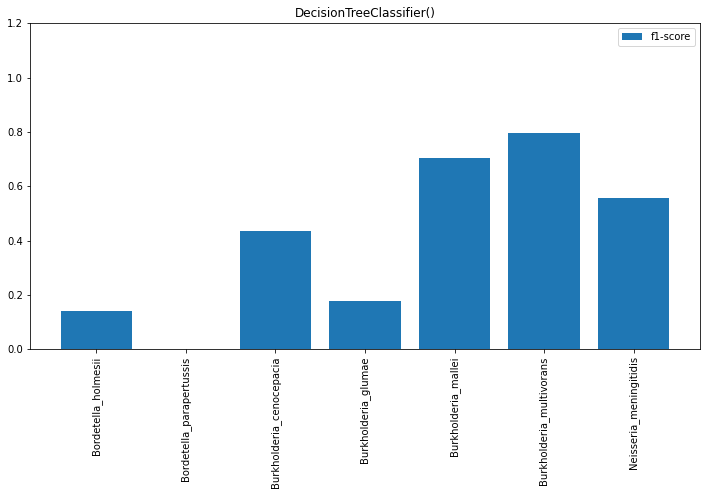

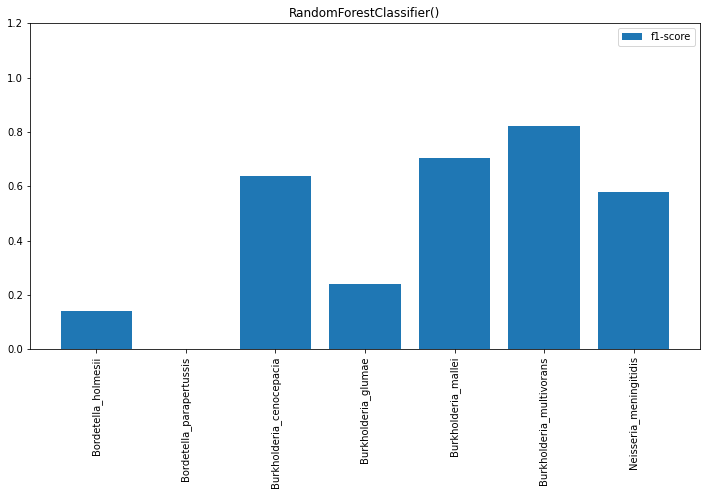

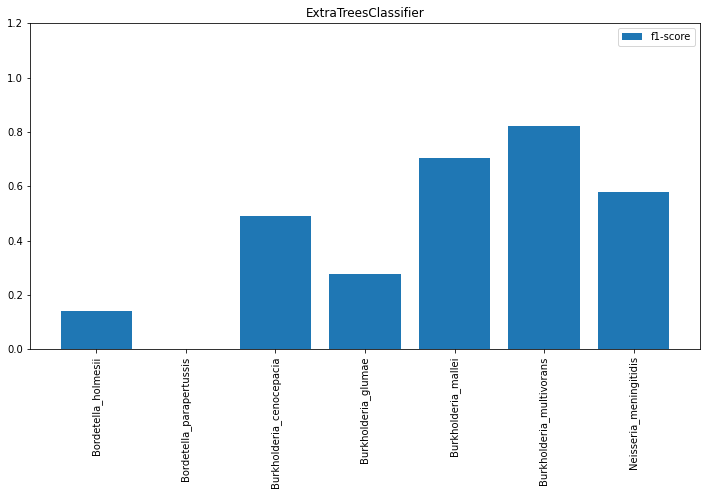

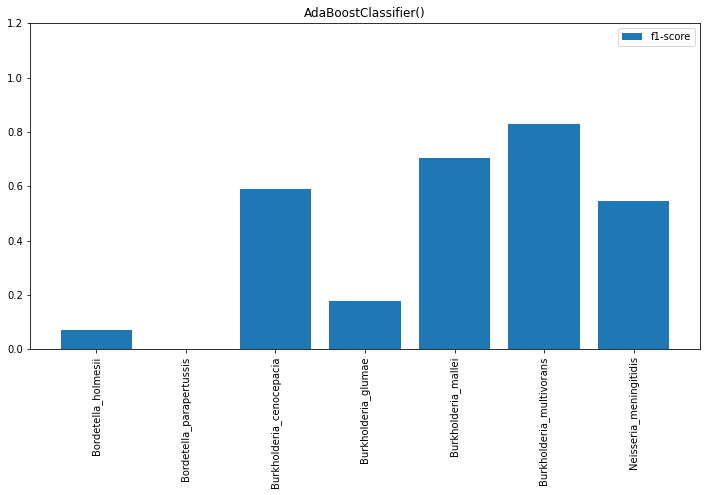

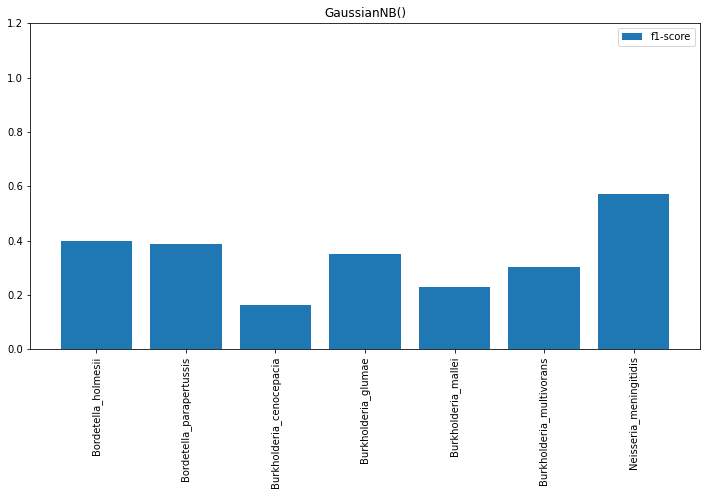

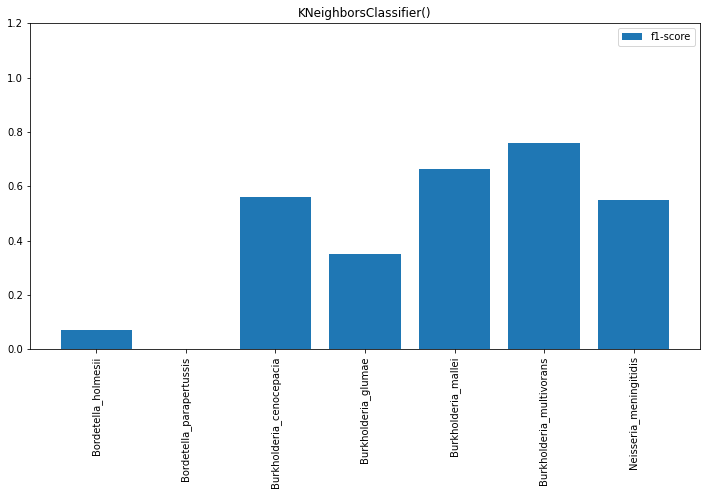

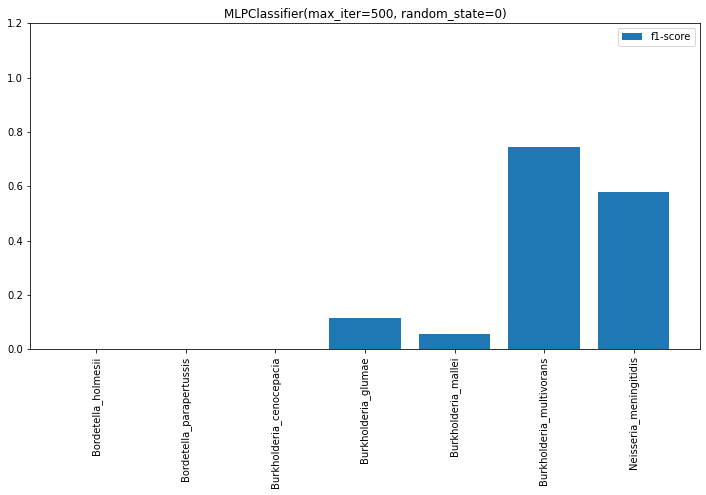

In [967]:
for row in range(len(df)):
    plt.figure(figsize=(12,6))
    plt.bar(clusters_data.columns, f1_data.iloc[row,:], label = "f1-score")
    plt.xticks(rotation=90)
    plt.ylim(0, 1.2)
    plt.legend()
    plt.title(classifiers_name[row])
    plt.savefig('f1_score_' + classifiers_name[row] + '.png', dpi=200, bbox_inches="tight")
    plt.show()

UMAP

In [421]:
fit = umap.UMAP()
scaled_cluster_data = StandardScaler().fit_transform(aflp_data, clusters_data)
mapper = fit.fit_transform(scaled_cluster_data)


In [422]:
mapper.shape


(303, 2)

In [423]:
hue = pd.read_excel(open('Hue.xlsx', 'rb'))


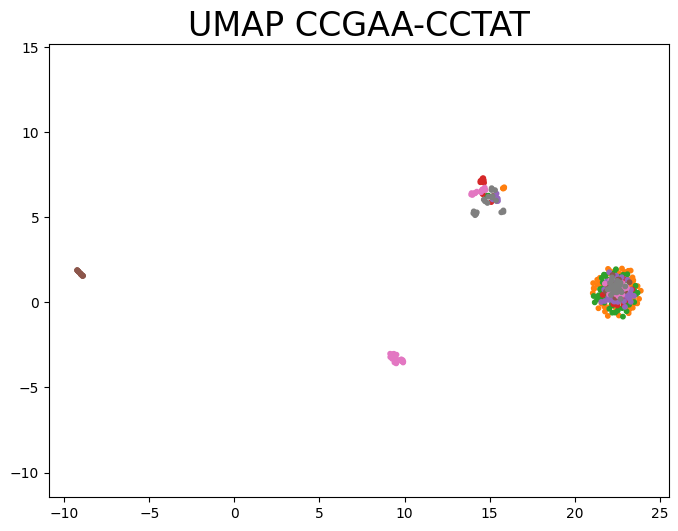

In [425]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)

color=[sns.color_palette()[x] for x in hue["Names"]]

plt.scatter(
    mapper[:, 0],
    mapper[:, 1],
    s=10, marker='o',
    c=color)
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP CCGAA-CCTAT', fontsize=24)